## Problem 1

Create a binary image using either the set of morphology functions from `skimage` (e.g. `disk`, `rectangle`, `diamond`, etc) or a binarized image from your own work, or a combination of both. Please try to get creative, and use more than just a single object e.g. use the `np.tile` function and `np.pad` function to help with this.

Demonstrate some of the morphology functions we used over the past two lectures. Please demo at least 3.

I am using the lily image I binarized for my project with Gunnar. This method involves binarizing the image based on a chosen pixel's rgb values. I've run into an issue where the binarized image either has too narrow of a window to capture the full size of the tepals, or the thump of the person holding the lily in the color image is included in the binary mask. I am working on a different binarization method now, but will use the imperfect solution in this example. 

In [77]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
#access test image on google drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
lily = plt.imread('/content/drive/MyDrive/testlilyslice.jpeg')
rgb_pixel = [215,158,43] #pixel values identified using color picker in powerpoint.

In [32]:
def color_binarize(im, r, g, b):
  w, h, a = im.shape
  binary_im = np.zeros((w,h)) 
  error_code = 'Error: pixel values must be between 0 and 255'

  for x,i in enumerate(im):
    for y,j in enumerate(i):
      temp_r, temp_g, temp_b = j
      if temp_r in range(r-30,r+30) and temp_g in range(g-30,g+30) and temp_b in range(b-30,b+30):
        binary_im[x,y]=0
      else:
        binary_im[x,y]=1
  return binary_im

In [33]:
lily_mask = color_binarize(lily, rgb_pixel[0], rgb_pixel[1], rgb_pixel[2])

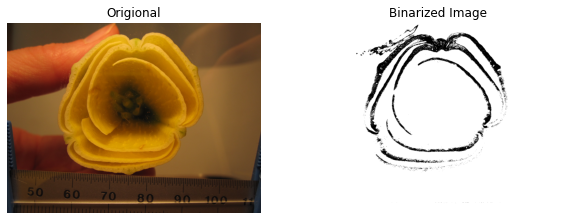

In [34]:
#plot and compare
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].imshow(lily)
ax[1].imshow(lily_mask, cmap='gray')
ax[0].set_title('Origional')
ax[1].set_title('Binarized Image')

for axi in ax:
  axi.axis('off')

Now I will demo 3 morphology functions: erosion, opening, and closing. I will demo each function on its own and with a disk of size 3 as the structuring element.

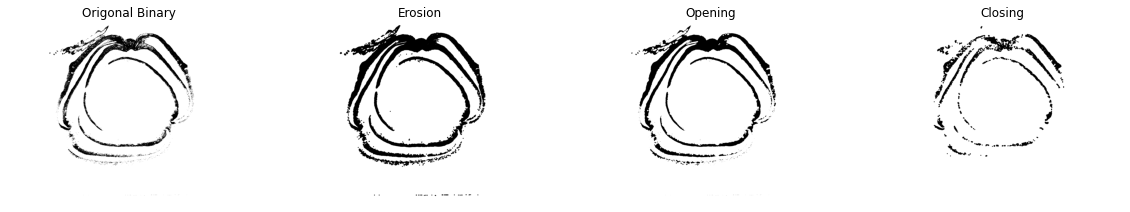

In [35]:
from skimage.morphology import opening, closing, disk, erosion

lily_hat = black_tophat(lily_mask, selem=selem)
lily_erode = erosion(lily_mask, disk(3))
lily_open = opening(lily_mask, disk(3))
lily_close = closing(lily_mask, disk(3))

titles = ['Origonal Binary','Erosion', 'Opening', 'Closing']

fig, ax = plt.subplots(ncols=4, figsize=(20,6))
ax[0].imshow(lily_mask, cmap='gray')
ax[1].imshow(lily_erode, cmap='gray')
ax[2].imshow(lily_open, cmap='gray')
ax[3].imshow(lily_close, cmap='gray')

for i,axi in enumerate(ax):
  axi.axis('off')
  axi.set_title(titles[i])



# Problem 2

Similar to the workflow we used in class, use grayscale openings and closings to construct a histogram of particle sizes from the image at the following [URL](https://www.researchgate.net/profile/Sean_Geary2/publication/260718274/figure/fig1/AS:296758283390976@1447764096279/SEM-micrographs-showing-smooth-morphology-of-PLGA-nanoparticles.png). You may need to perform some image pre-processing (e.g. reduce dimensions, flatten to grayscale image). In class, we used the total intensity of the grayscale opening subtracted from the original image as a surrogate measure of particle size. You may want to do something more accurate, such as thresholding the image and counting the number of white pixels.



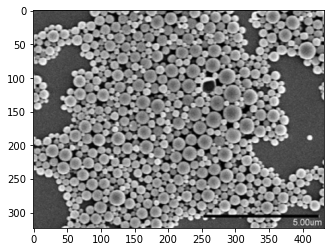

In [103]:
from skimage.morphology import white_tophat, black_tophat
from skimage.transform import resize, rescale
from skimage.util import img_as_ubyte

im_raw = img_as_ubyte(plt.imread('/content/drive/MyDrive/SEM-micrographs-showing-smooth-morphology-of-PLGA-nanoparticles.png'))
im = im_raw[:,:,0]
im = rescale(im, 0.75)
plt.imshow(im, cmap='gray')

Write a function that isolates a particles of a particular size by taking the white_tophat with that selem size and subtracting the white_tophat with a selem one size smaller. White top hat removes everything above the selem size given.

In [93]:
def isolate_particles(image, size):
  im_larger = white_tophat(image, selem=disk(size))
  im_smaller = white_tophat(image, selem=disk(size-1))
  isolated_particles = im_larger - im_smaller
  return isolated_particles

Use this function to isolate 15 different sizes.

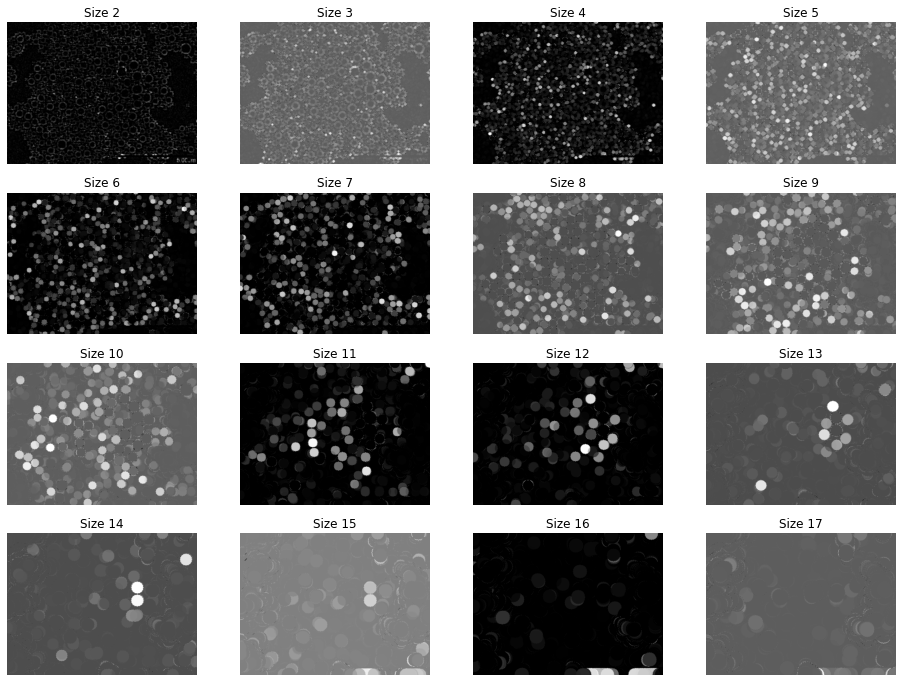

In [104]:
Sizes = []
titles = []


for j in range(2,18):
  Sizes.append(isolate_particles(im,j))
  titles.append('Size ' + str(j))

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(16, 12))

for i,axi in enumerate(axes):
  for j, ax in enumerate(axi):
    ax.axis('off')
    ax.imshow(Sizes[(i*4) + j], cmap='gray')
    ax.set_title(titles[(i*4) + j])

Try thresholding the images using threshold_mean and counting the number of white pixels. 

In [119]:
from skimage.filters import threshold_otsu

print(im.size)


139536


Find the average pixel value by adding all the pixel values and dividing by the number of pixels. 

In [115]:
test = []
for x,image in enumerate(Sizes):
  temp_value = 0
  for i in image:
    for j in i:
      temp_value += j
  temp_value = temp_value / ((x+2)**2)
  test.append(temp_value)

print(test)

[737.6022445820366, 466.595612348822, 301.7252081689209, 258.08877427709183, 156.170230466923, 109.79337832139737, 81.62542993333639, 62.13286315380054, 43.64823387766045, 22.394780573404773, 13.242228008908773, 7.188424726086508, 4.484777791406975, 2.2681151423989157, 2.287136700333018, 1.0116782409522813]


(array([9., 2., 1., 1., 1., 0., 1., 0., 0., 1.]),
 array([  1.01167824,  74.67073488, 148.32979151, 221.98884814,
        295.64790478, 369.30696141, 442.96601805, 516.62507468,
        590.28413131, 663.94318795, 737.60224458]),
 <a list of 10 Patch objects>)

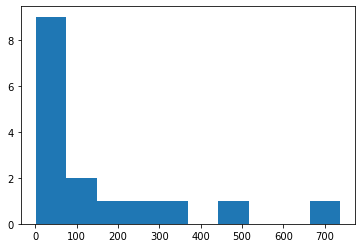

In [116]:
plt.hist(test)

TypeError: ignored

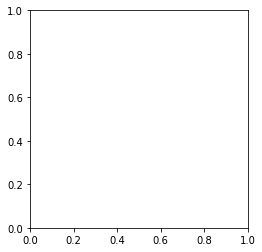

# Problem 3

Now that we have a few more image processing tools available, you should be able do slightly more sophisticated workflows. Make a Jupyter notebook demonstrating one of your project workflows. Each team member should submit a different notebook, although they can demonstrate similar functions. The Jupyter notebook should include both text as Markdown (similar to the current cell) and code.

Please be sure to switch between text and code, instead of having a solid block of text and a solid block of code. Try to key blocks of code under 10 lines. Explain in words in the text what each block of code does.

An example of my workflow is on our project git-hub and is called "LilyMaskBinarization". Link to the page: https://github.com/nicolepanek/2021_LilyProject/blob/Lily_mask_creation/LilyMaskBinarization.ipynb